In [1]:
from matplotlib import pyplot as plt
import numpy as np

from pynpoint import Pypeline, FitsReadingModule, PSFpreparationModule, PcaPsfSubtractionModule
from pynpoint.readwrite.attr_reading import ParangReadingModule

import redux_utils

/home/asatk/PynPoint/pynpoint/util/wavelets.py:18: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
/home/asatk/PynPoint/pynpoint/util/apply_func.py:591: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
/home/asatk/PynPoint/pynpoint/util/apply_func.py:761: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to th

In [2]:
datadir = "./data"
outdir = "./out"

firstchannelnum = 40
lastchannelnum = 80
channelnums = range(firstchannelnum, lastchannelnum)
nchnls = len(channelnums)
datapath = "./data/005_center_multishift/wl_channel_%05i.fits"
datapaths = [datapath%(channelnum) for channelnum in channelnums]

In [3]:
tempanglesname = "tempangles.txt"
tempangles = np.array([redux_utils.angles] * nchnls).flatten()
with open(datadir + "/" + tempanglesname, "w") as anglesfile:
    anglesfile.write('\n'.join(str(i) for i in tempangles))

In [4]:
pipeline = Pypeline(working_place_in=datadir,
                    input_place_in=datadir,
                    output_place_in=outdir)

module = FitsReadingModule(name_in="read",
                           filenames=datapaths,
                           image_tag='read')

pipeline.add_module(module)

module = ParangReadingModule(name_in="angs",
                             data_tag='read',
                             file_name=tempanglesname)

pipeline.add_module(module)

# module = PSFpreparationModule(name_in='prep',
#                               image_in_tag='stack',
#                               image_out_tag='prep',
#                               mask_out_tag=None,
#                               norm=False,
#                               resize=None,
#                               cent_size=0.15,
#                               edge_size=1.1)

# pipeline.add_module(module)

module = PcaPsfSubtractionModule(pca_numbers=[20, ],
                                 name_in='pca',
                                 images_in_tag='read',
                                 reference_in_tag='read',
                                 res_median_tag='residuals')

pipeline.add_module(module)

PynPoint v0.10.0

Working place: ./data
Input place: ./data
Output place: ./out

Database: ./data/PynPoint_database.hdf5
Configuration: ./data/PynPoint_config.ini

Number of CPUs: 8
Number of threads: not set


In [5]:
pipeline.run()


-----------------
FitsReadingModule
-----------------

Module name: read


/home/asatk/PynPoint/pynpoint/util/attributes.py:76: UserWarning: Static attribute INSTRUMENT (=INSTRUME) not found in the FITS header.
  warnings.warn(f'Static attribute {attr} (={fitskey}) not found in the FITS '
/home/asatk/PynPoint/pynpoint/util/attributes.py:76: UserWarning: Static attribute DIT (=ESO DET DIT) not found in the FITS header.
  warnings.warn(f'Static attribute {attr} (={fitskey}) not found in the FITS '
/home/asatk/PynPoint/pynpoint/util/attributes.py:76: UserWarning: Static attribute LATITUDE (=ESO TEL GEOLAT) not found in the FITS header.
  warnings.warn(f'Static attribute {attr} (={fitskey}) not found in the FITS '
/home/asatk/PynPoint/pynpoint/util/attributes.py:76: UserWarning: Static attribute LONGITUDE (=ESO TEL GEOLON) not found in the FITS header.
  warnings.warn(f'Static attribute {attr} (={fitskey}) not found in the FITS '
/home/asatk/PynPoint/pynpoint/util/attributes.py:125: UserWarning: Non-static attribute EXP_NO (=ESO DET EXP NO) not found in the FITS 

Reading FITS files... [DONE]                      
Output ports: read (88080, 63, 63), fits_header/wl_channel_00040.fits (7,), fits_header/wl_channel_00041.fits (7,), fits_header/wl_channel_00042.fits (7,), fits_header/wl_channel_00043.fits (7,), fits_header/wl_channel_00044.fits (7,), fits_header/wl_channel_00045.fits (7,), fits_header/wl_channel_00046.fits (7,), fits_header/wl_channel_00047.fits (7,), fits_header/wl_channel_00048.fits (7,), fits_header/wl_channel_00049.fits (7,), fits_header/wl_channel_00050.fits (7,), fits_header/wl_channel_00051.fits (7,), fits_header/wl_channel_00052.fits (7,), fits_header/wl_channel_00053.fits (7,), fits_header/wl_channel_00054.fits (7,), fits_header/wl_channel_00055.fits (7,), fits_header/wl_channel_00056.fits (7,), fits_header/wl_channel_00057.fits (7,), fits_header/wl_channel_00058.fits (7,), fits_header/wl_channel_00059.fits (7,), fits_header/wl_channel_00060.fits (7,), fits_header/wl_channel_00061.fits (7,), fits_header/wl_channel_00062.fits

In [6]:
residuals = pipeline.get_data('residuals')
pixscale = pipeline.get_attribute('residuals', 'PIXSCALE')
size = pixscale * residuals.shape[-1]/2

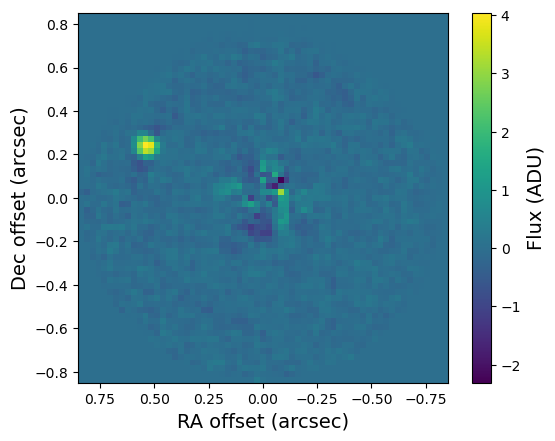

In [7]:
plt.imshow(residuals[0, ], origin='lower', extent=[size, -size, -size, size])
plt.xlabel('RA offset (arcsec)', fontsize=14)
plt.ylabel('Dec offset (arcsec)', fontsize=14)
cb = plt.colorbar()
cb.set_label('Flux (ADU)', size=14.)